## Data Insights & Wrangling

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# Study data files
suicide_data_path = "Suicide_Data/master.csv"
continent_path = "Suicide_Data/continents.csv"

In [3]:
# Read the Suicide and Continent data
suicide_data = pd.read_csv(suicide_data_path)
continent_data = pd.read_csv(continent_path)
suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
continent_data.head()

,country,continent
0,Algeria,Africa
1,Angola,Africa
2,Aruba,South America
3,Benin,Africa
4,United States,North America


In [5]:
# Combine the suicide & continent data into a single dataset
combined_data = pd.merge(suicide_data, continent_data, on='country')
combined_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,Europe


In [6]:
# Checking the existence of null values in the DataFrame.
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27448 entries, 0 to 27447
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27448 non-null  object 
 1   year                27448 non-null  int64  
 2   sex                 27448 non-null  object 
 3   age                 27448 non-null  object 
 4   suicides_no         27448 non-null  int64  
 5   population          27448 non-null  int64  
 6   suicides/100k pop   27448 non-null  float64
 7   country-year        27448 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27448 non-null  object 
 10  gdp_per_capita ($)  27448 non-null  int64  
 11  generation          27448 non-null  object 
 12  continent           27448 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 2.9+ MB


In [7]:
# Create a clean DataFrame by dropping unwanted columns
combined_data.drop(['suicides/100k pop','HDI for year','generation'],axis=1, inplace=True)
combined_data.head()

,country,year,sex,age,suicides_no,population,country-year,gdp_for_year ($),gdp_per_capita ($),continent
0,Albania,1987,male,15-24 years,21,312900,Albania1987,"2,156,624,900",796,Europe
1,Albania,1987,male,35-54 years,16,308000,Albania1987,"2,156,624,900",796,Europe
2,Albania,1987,female,15-24 years,14,289700,Albania1987,"2,156,624,900",796,Europe
3,Albania,1987,male,75+ years,1,21800,Albania1987,"2,156,624,900",796,Europe
4,Albania,1987,male,25-34 years,9,274300,Albania1987,"2,156,624,900",796,Europe


In [8]:
#Slice data for 2000s
suicide_data_2000s = combined_data[combined_data["year"].isin(range(2000,2011))]
suicide_data_2000s

,country,year,sex,age,suicides_no,population,country-year,gdp_for_year ($),gdp_per_capita ($),continent
132,Albania,2000,male,25-34 years,17,232000,Albania2000,"3,632,043,908",1299,Europe
133,Albania,2000,male,55-74 years,10,177400,Albania2000,"3,632,043,908",1299,Europe
134,Albania,2000,female,75+ years,2,37800,Albania2000,"3,632,043,908",1299,Europe
135,Albania,2000,male,75+ years,1,24900,Albania2000,"3,632,043,908",1299,Europe
136,Albania,2000,female,15-24 years,6,263900,Albania2000,"3,632,043,908",1299,Europe
...,...,...,...,...,...,...,...,...,...,...
27395,Uzbekistan,2010,female,35-54 years,101,3339076,Uzbekistan2010,"39,332,770,929",1533,Asia
27396,Uzbekistan,2010,male,5-14 years,48,2751752,Uzbekistan2010,"39,332,770,929",1533,Asia
27397,Uzbekistan,2010,female,75+ years,5,322899,Uzbekistan2010,"39,332,770,929",1533,Asia
27398,Uzbekistan,2010,female,55-74 years,16,1161422,Uzbekistan2010,"39,332,770,929",1533,Asia


In [11]:
suicide_data_2000s.to_csv("output_data/suicide_data_2000s.csv")

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation
#and SEM of Suicide no for each country
suicide_data_2000s_by_country = suicide_data_2000s.groupby('country')
suicide_data_2000s_by_country.head()

,country,year,sex,age,suicides_no,population,country-year,gdp_for_year ($),gdp_per_capita ($),continent
132,Albania,2000,male,25-34 years,17,232000,Albania2000,"3,632,043,908",1299,Europe
133,Albania,2000,male,55-74 years,10,177400,Albania2000,"3,632,043,908",1299,Europe
134,Albania,2000,female,75+ years,2,37800,Albania2000,"3,632,043,908",1299,Europe
135,Albania,2000,male,75+ years,1,24900,Albania2000,"3,632,043,908",1299,Europe
136,Albania,2000,female,15-24 years,6,263900,Albania2000,"3,632,043,908",1299,Europe
...,...,...,...,...,...,...,...,...,...,...
27304,Uzbekistan,2000,male,35-54 years,528,2289656,Uzbekistan2000,"13,760,374,488",632,Asia
27305,Uzbekistan,2000,male,25-34 years,355,1843476,Uzbekistan2000,"13,760,374,488",632,Asia
27306,Uzbekistan,2000,male,55-74 years,153,802122,Uzbekistan2000,"13,760,374,488",632,Asia
27307,Uzbekistan,2000,male,15-24 years,350,2492264,Uzbekistan2000,"13,760,374,488",632,Asia


In [14]:
# suicides_no_mean
suicides_no_mean = suicide_data_2000s_by_country['suicides_no'].mean()
# suicides_no_median
suicides_no_median = suicide_data_2000s_by_country['suicides_no'].median()
# suicides_no_variance
suicides_no_variance = suicide_data_2000s_by_country['suicides_no'].var()
# suicides_no_std
suicides_no_std = suicide_data_2000s_by_country['suicides_no'].std()
# suicides_no_sem
suicides_no_sem = suicide_data_2000s_by_country['suicides_no'].sem()

# include statistical analysis series in a df
suicides_no_stats = pd.concat([suicides_no_mean, suicides_no_median, suicides_no_variance, suicides_no_std, suicides_no_sem], axis=1)
suicides_no_stats.columns = ['suicides_no_mean','suicides_no_median','suicides_no_variance','suicides_no_std','suicides_no_sem']
suicides_no_stats

,suicides_no_mean,suicides_no_median,suicides_no_variance,suicides_no_std,suicides_no_sem
country,,,,,
Albania,7.242424,4.0,7.574231e+01,8.703006,0.757499
Antigua and Barbuda,0.066667,0.0,7.955182e-02,0.282049,0.025747
Argentina,253.606061,168.5,4.651398e+04,215.671002,18.771751
Armenia,5.481481,3.0,3.395292e+01,5.826914,0.560695
Aruba,0.568182,0.0,1.041117e+00,1.020352,0.088810
...,...,...,...,...,...
United Arab Emirates,8.638889,3.0,1.740368e+02,13.192300,1.554727
United Kingdom,344.363636,221.5,1.429073e+05,378.030842,32.903361
United States,2782.643939,2282.5,8.516644e+06,2918.328966,254.007933


In [15]:
suicides_no_stats.to_csv("output_data/suicides_no_stats.csv")

In [ ]:
# Top 5 countries with highest suicide no 

In [ ]:
# Top country per continent with highest suicide no

### Data Plotting

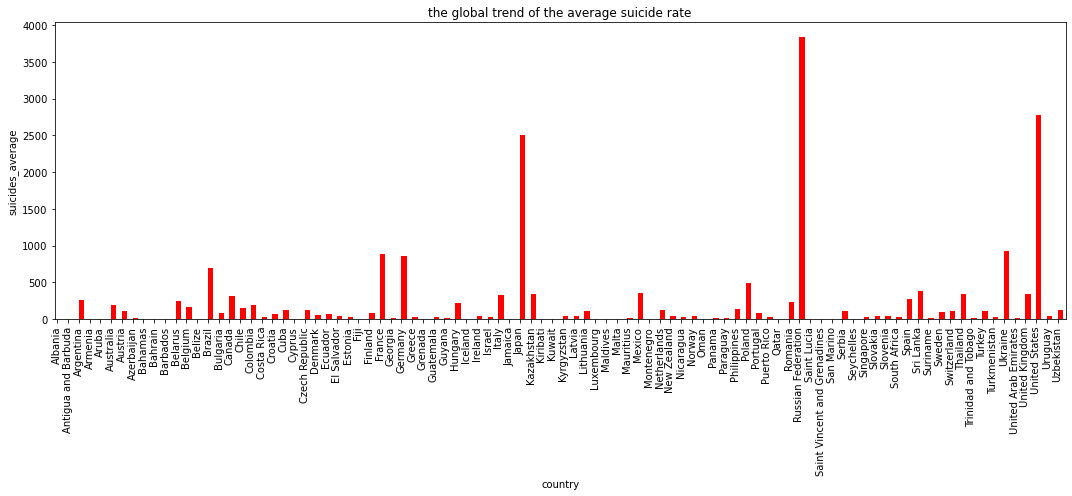

In [16]:
# bar plot showing the global trend of the average suicide rate 
suicide_global_trend = suicides_no_stats['suicides_no_mean'].plot(kind='bar', figsize=(15,7), title="the global trend of the average suicide rate",\
                                                                  color="r",align="edge")
suicide_global_trend.set_xlabel("country")
suicide_global_trend.set_ylabel("suicides_average")
plt.tight_layout()
plt.show()

In [ ]:
# bar plot showing relationt between the age group and suicide no

In [ ]:
# What is the relationship between age groups and generation on suicide rates?

In [ ]:
# pie plot showing the distribution of female versus male suicide no
#  Are men or women more likely to commit suicide?

In [ ]:
# line plot showing the relation between suicide no and GDP per capita 


## Correlation

In [ ]:
# Calculate the correlation coefficient for Population and GDP


In [ ]:
# Calculate the correlation coefficient for Population and suicide no
